# *Liver Patient identification*
- ## *The target is to identify whether the patient has an anomaly or abnormal functioning of the liver.*

## *Notebook content*

### *Data preparation*
- ### Importing dataset,domain analysis,data cleaning,all statistical summery,Outlier detection,EDA-univariate, bivariate, multivariate analysis of features, with various graphical representation.

### *Machine Learning*
- ### Data scaling,train test split,Used 7 classification models,with SMOTE & without SMOTE Analysis,graphical representation,ROC &AUC,Feature Importance.

### *Deployment*
- ### Using XGB Classifier

### *Importing Libraries*


In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

### *Importing dataset*

In [10]:

data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


### *Header arrangements*

In [11]:


df1=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### *Assigning column names*


In [12]:

df1.columns=['age','gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alanine_Aminotransferase','Aspartate_Aminotransferase',
            'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','outcome']
df1.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### *Checking file size*

In [13]:

df1.shape

(583, 11)

### *Understanding of features-Domain Analysis*

- ### *This is a small dataset contains 583 records with 11 features, also unbalanced dataset.*

- ### *The features given are age, gender, Total bilirubin, Direct bilirubin, Alkaline phosphaotase, Alamine Aminotransferase,Total protiens, Albumin, Albumib and globulin ration, and outcome.*

- ### *Bilirubin- A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*
 ### *For adults over 18, normal total bilirubin can be up to 1.2 milligrams per deciliter (mg/dl) of blood. For those under 18, the normal level will be will be 1 mg/dl. Normal results for conjugated (direct) bilirubin should be less than 0.3 mg/dl.*
- ### *Total Bilirubin-Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*

- ### *Direct Bilirubin-Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect.*

- ### *Alkaline_Phosphotase- Alkaline phosphatase (ALP) is an enzyme that is present in many parts of the body, but it is primarily found in the liver, bones, intestine, and kidneys. Alkaline phosphatase testing measures the amount of this enzyme in the blood.The normal level of ALP is 20 to 140IU/L.*
 ### *Higher-than-normal levels of ALP in your blood may indicate a problem with your liver or gallbladder.*

- ### *Alanine aminotransferase-It is usually referred to as ALT, is an enzyme that is concentrated primarily in the liver.The normal range is 4 to 36 U/L.*
 ### *High levels of ALT can be a result of damage or injury to cells. Because ALT is most concentrated in the liver.*

- ### *Aspartate aminotransferase- (AST) is an enzyme. Enzymes are types of proteins that enable most bodily processes. AST exists mostly in the liver, but it is found in numerous tissues in the body.The normal range is 8 to 33 U/L.*
 ### *High levels of AST in the blood may indicate liver diseases.*

- ### *Total Protien-The total protein test measures the total amount albumin and globulin in your body.*
 ### *The normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L.A high total protein level could indicate dehydration.*

- ### *Albumin_and_Globulin_Ratio	-High A/G ratio: This can be a sign of disease in your liver, kidney.*
 ### *albumin/globulin ratio between 1.1 and 2.5 is considered normal.*


## *Data Analysis & Cleaning*

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### *Checking for null values*

In [15]:
# 4 missing values in A/G Ratio.
df1.isnull().sum()

age                           0
gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
outcome                       0
dtype: int64

### *Statistical summery*

In [16]:


df1.describe()

,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### *Replacing missing values by its mean*


In [17]:
df=df1.fillna(df1.mean())
df.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### *Checking again for null values*

In [18]:
df.isnull().sum()

age                           0
gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
outcome                       0
dtype: int64

### *Checking the datatypes of each column*


In [19]:
df.dtypes

age                             int64
gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
outcome                         int64
dtype: object

### *Changing gender column to numeric,hence dtype changed*

In [20]:
df.gender = df.gender.replace(['Male'],'3')
df.gender = df.gender.replace(['Female'],'4')
df.head(3)

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,4,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,3,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,3,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [21]:
df.dtypes

age                             int64
gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
outcome                         int64
dtype: object

### *Changing gender datatype using astype*

In [22]:
df.gender = df.gender.astype('int64')

In [23]:
df.dtypes

age                             int64
gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
outcome                         int64
dtype: object

In [24]:
df.outcome.value_counts()

1    416
2    167
Name: outcome, dtype: int64

- ### *Dataset contains Higher number of Liverpatients*


### *Checking for correlation*


In [25]:
df.corr()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alanine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


### *Heatmap*

<AxesSubplot:>

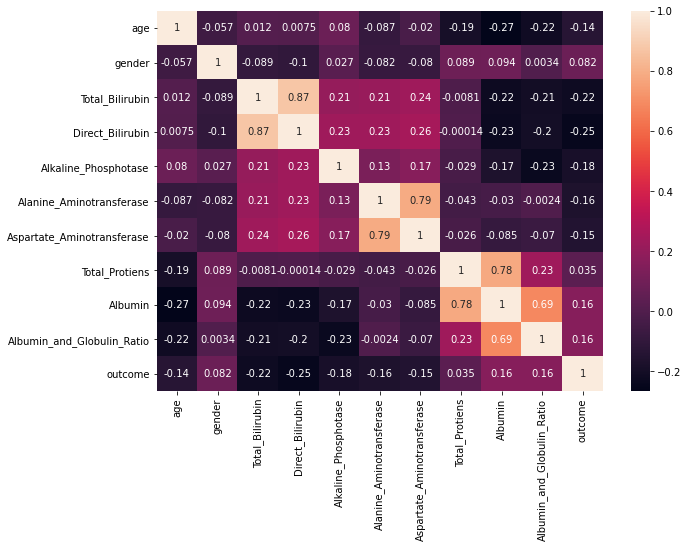

In [26]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),annot=True)


### *From the heatmap Direct_Bilirubin & Total_Bilirubin, Alanine_Aminotransferase & Aspartate_Aminotransferase, Albumin & Total_Protiens are highly correlated features*


- ## *Correlation*


In [27]:
df.corr().outcome

age                          -0.137351
gender                        0.082416
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alanine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.162319
outcome                       1.000000
Name: outcome, dtype: float64

In [28]:
df.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,outcome
0,65,4,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,3,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,3,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3,3.9,2.0,195,27,59,7.3,2.4,0.40,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Direct_Bilirubin'}>,
        <AxesSubplot:title={'center':'Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alanine_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Total_Protiens'}>,
        <AxesSubplot:title={'center':'Albumin'}>],
       [<AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>,
        <AxesSubplot:title={'center':'outcome'}>, <AxesSubplot:>]],
      dtype=object)

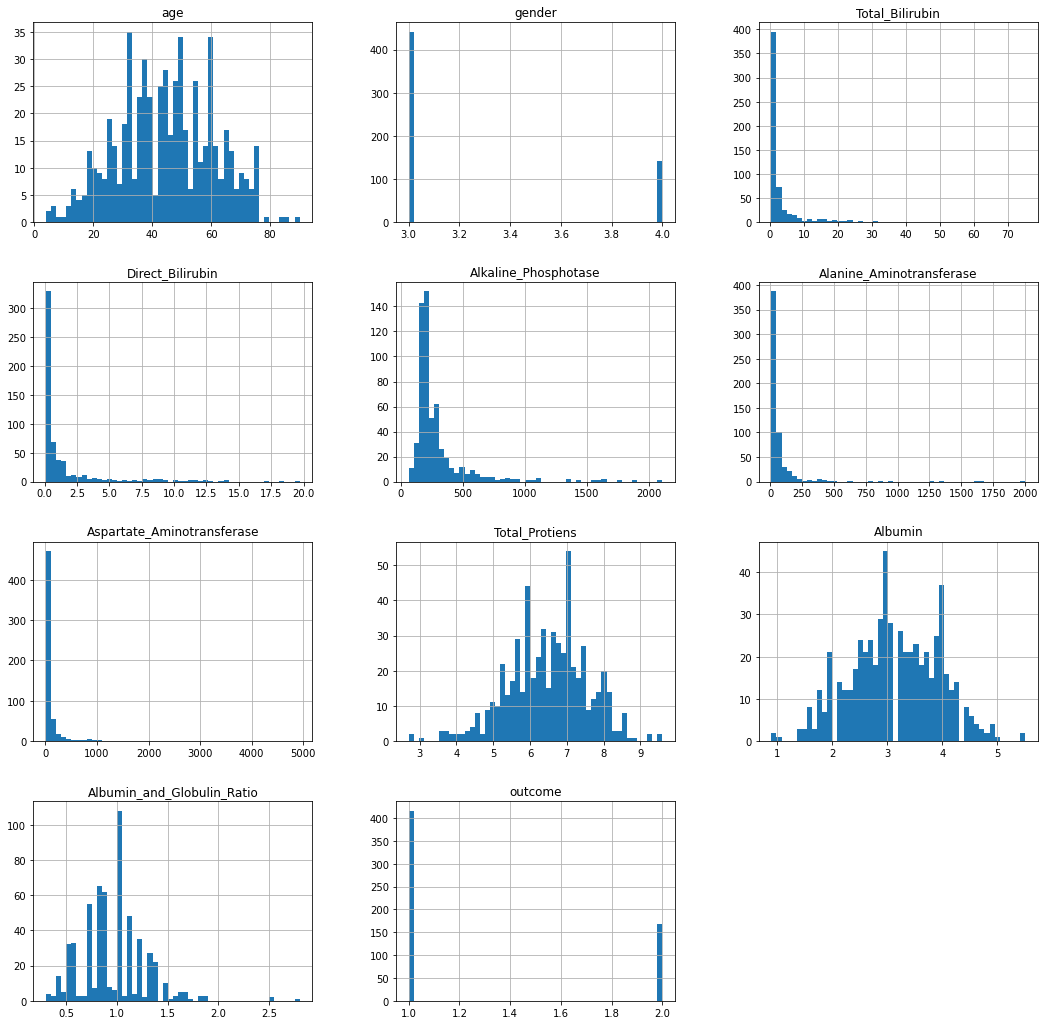

In [29]:
df.hist(bins=50, figsize=(18,18))

## *Feature analysis*

In [30]:
df.age.value_counts()

60    34
45    25
50    23
38    21
42    21
      ..
8      1
78     1
84     1
85     1
90     1
Name: age, Length: 72, dtype: int64

### *Age disrtibution graph*

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


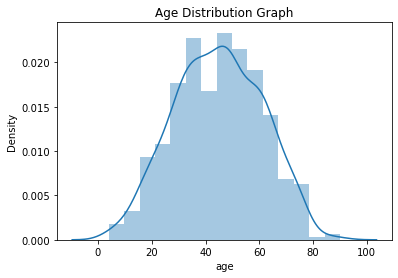

In [31]:
sns.distplot(df['age'])
plt.title('Age Distribution Graph')
plt.show()


- ### *Most of the patients age lies between 45 to 60.*

In [32]:
DG=df.gender.value_counts()
DG

3    441
4    142
Name: gender, dtype: int64

### *Number of females in the dataset:142*
### *Number of males in the dataset:441*

### *Pie diagram for gender evaluation*

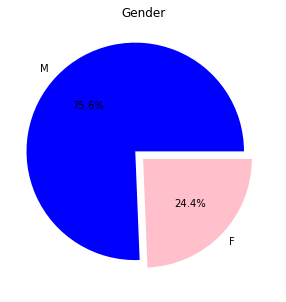

In [33]:
rcParams['figure.figsize'] = 5,5

plt.pie(DG,[0.1,0],colors=['blue','pink'],labels=['M','F'],autopct='%1.1f%%')
plt.title("Gender")
plt.show()

- ### *males are at higher risk of liver diseases as compare to females.*

### *outcome evaluation*


In [34]:
df.outcome.value_counts()

1    416
2    167
Name: outcome, dtype: int64

### *Pie plot for outcome*


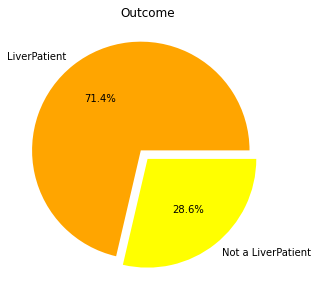

In [35]:
plt.pie(df.outcome.value_counts(),[0.1,0],colors=['orange','yellow'],labels=['LiverPatient','Not a LiverPatient'],autopct="%1.1f%%")
plt.title("Outcome")
plt.show()

### *Number of Liver Patients:416*
### *Number of not Liver Patients:167*

### *Countplot for Gender and outcome*

In [36]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

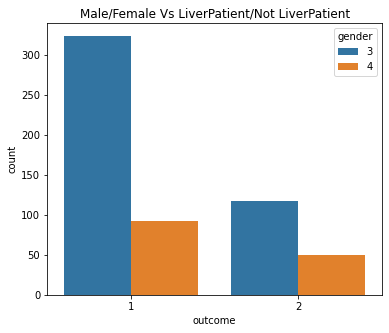

In [37]:
countplot_of_2('outcome','gender','Male/Female Vs LiverPatient/Not LiverPatient')


### *Barplot for Gender and Age*

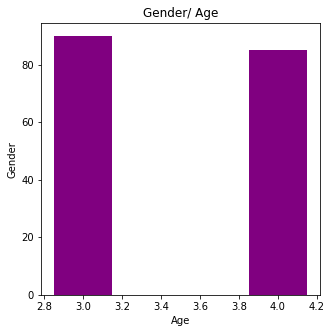

In [38]:
plt.bar(df.gender, df.age, color ='purple',width=0.3)
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Gender/ Age")
plt.show()

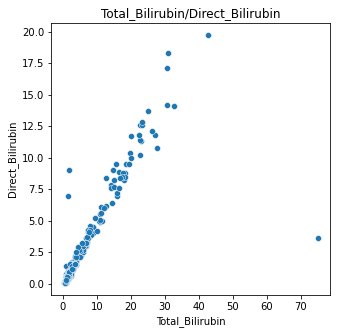

In [39]:
sns.scatterplot(x=df.Total_Bilirubin,y=df.Direct_Bilirubin)
plt.ylabel("Direct_Bilirubin")
plt.xlabel("Total_Bilirubin")

plt.title("Total_Bilirubin/Direct_Bilirubin")
plt.show()

- ### *Both features have a direct relationship with each other.*

### *Alkaline_Phosphotase/Alanine_Aminotransferase relationship*

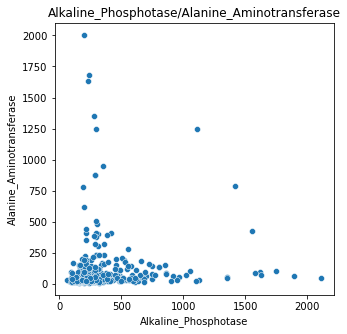

In [40]:
sns.scatterplot(x=df.Alkaline_Phosphotase,y=df.Alanine_Aminotransferase)
plt.xlabel("Alkaline_Phosphotase")
plt.ylabel("Alanine_Aminotransferase")

plt.title("Alkaline_Phosphotase/Alanine_Aminotransferase")
plt.show()

### *Total_protiens and Albumin*

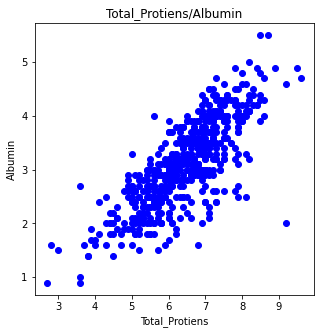

In [41]:
plt.scatter(df.Total_Protiens, df.Albumin, color ='blue')
plt.xlabel("Total_Protiens")
plt.ylabel("Albumin")
plt.title("Total_Protiens/Albumin")
plt.show()

- ### *Total_protiens and Albumin features are in positive regressive nature, with some outliers.*

### *Albumin/Albumin_and_Globulin_Ratio*

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


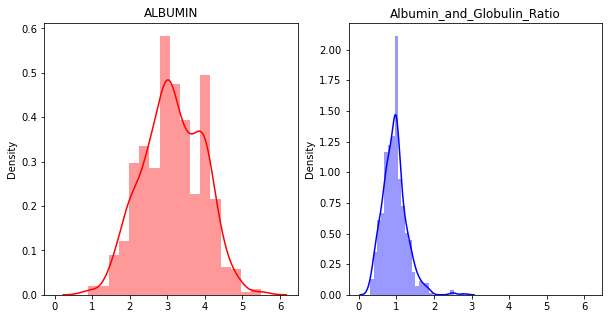

In [42]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True, figsize=(10,5))

sns.distplot(x=df.Albumin,ax=ax1,color='r')
sns.distplot(x=df.Albumin_and_Globulin_Ratio,ax=ax2,color='b')

ax1.title.set_text('ALBUMIN')
ax2.title.set_text('Albumin_and_Globulin_Ratio')
plt.show()

- ### *Albumin and Albumin_and_Globulin_Ratio, both share normal distribution and have a direct relationship like some other features in the dataset.Albumin_and_Globulin Ratio has regressive datapoints yet the most crowded (hotspot) being the male region i.e. they are at high risk in these features too.*

### *Pairplot for the dataset*

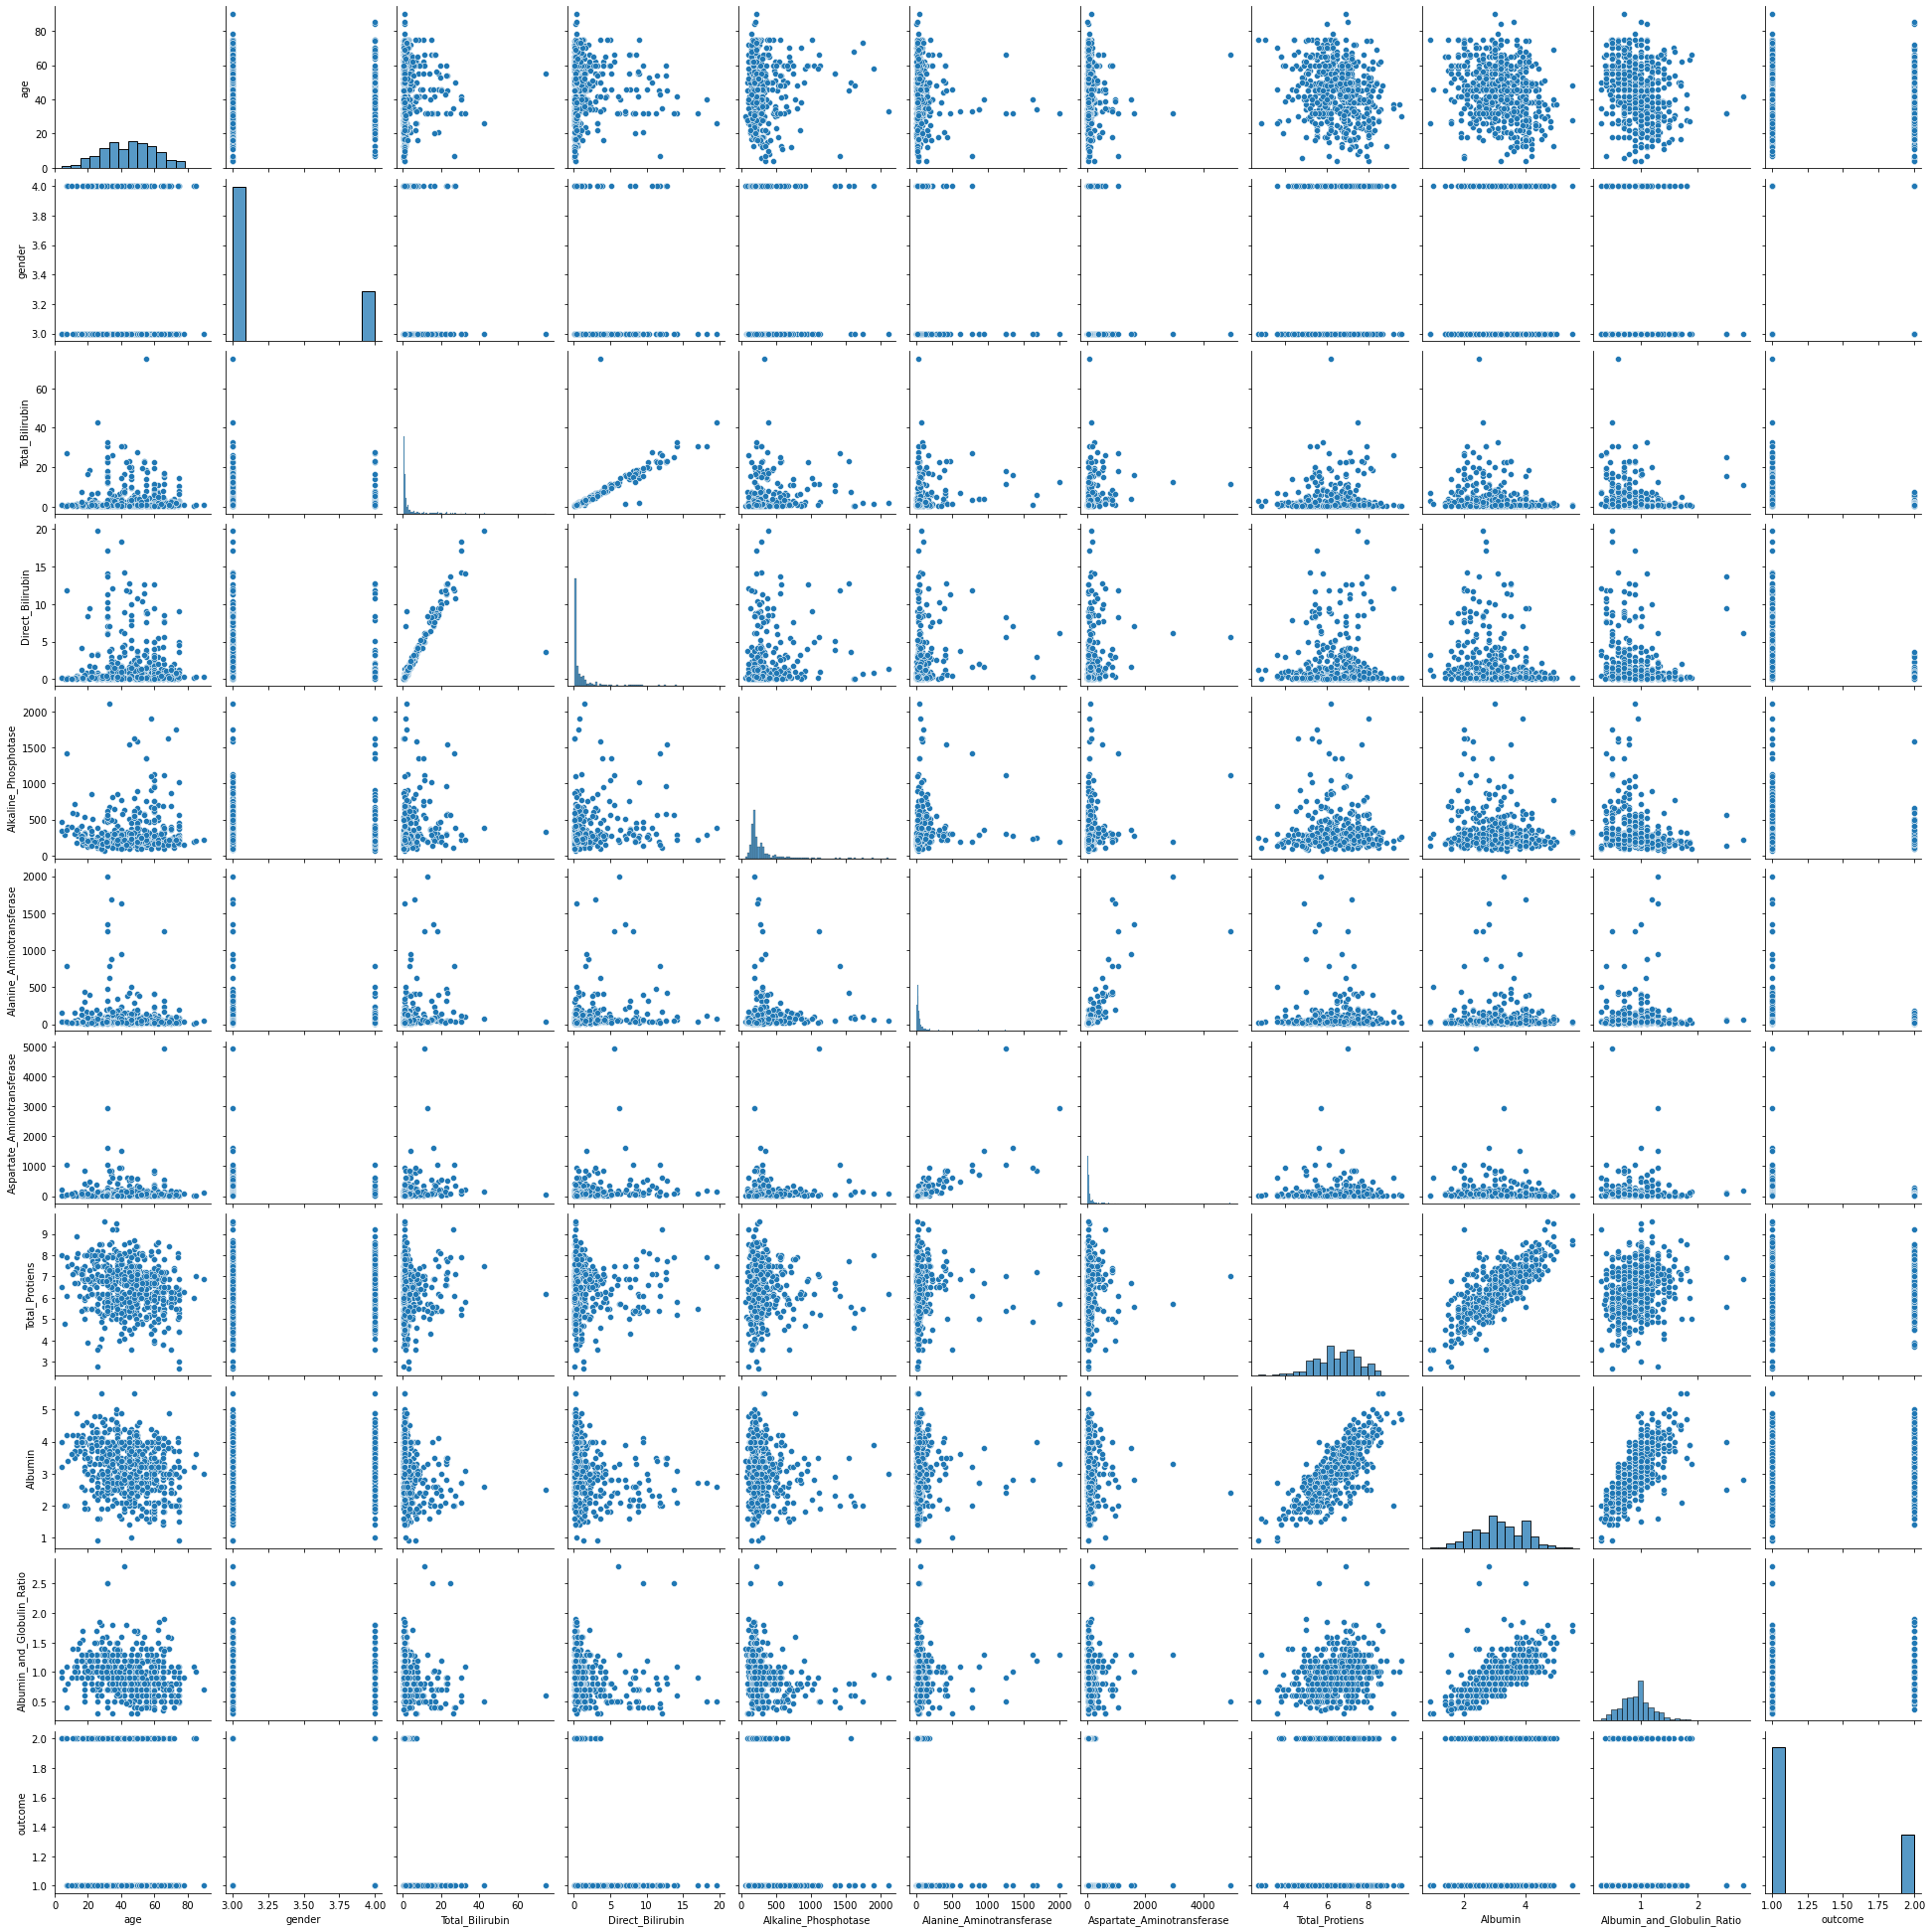

In [43]:
sns.pairplot(df)

- ### *From this pairplot we can easily interpret the relationship between the features.*

### *outlier checking*

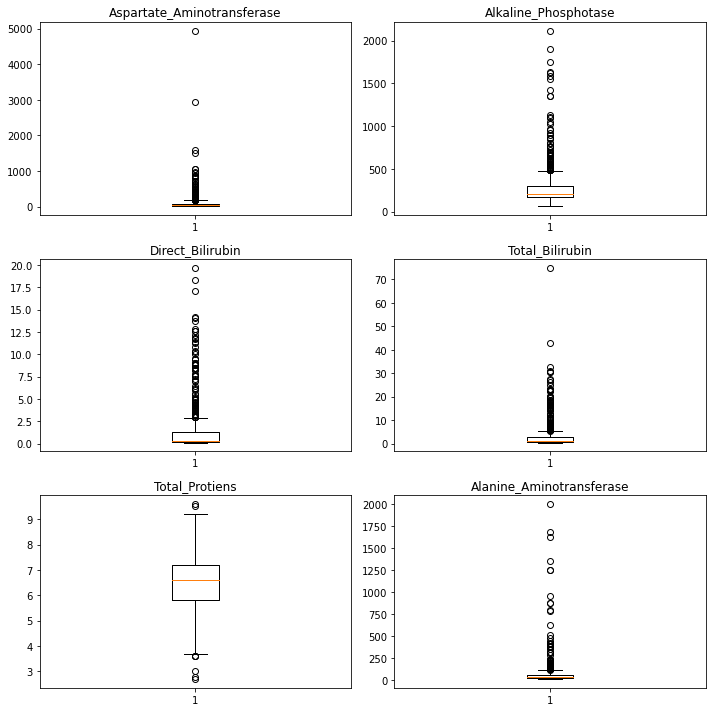

In [44]:
fig, ax = plt.subplots(3, 2,figsize=(10,10))

ax[0, 0].boxplot(df.Aspartate_Aminotransferase)
ax[0, 1].boxplot(df.Alkaline_Phosphotase)
ax[1, 0].boxplot(df.Direct_Bilirubin)
ax[1, 1].boxplot(df.Total_Bilirubin)
ax[2, 0].boxplot(df.Total_Protiens)
ax[2, 1].boxplot(df.Alanine_Aminotransferase)

ax[0, 0].set_title("Aspartate_Aminotransferase")
ax[0, 1].set_title("Alkaline_Phosphotase")
ax[1, 0].set_title("Direct_Bilirubin")
ax[1, 1].set_title("Total_Bilirubin")
ax[2, 0].set_title("Total_Protiens")
ax[2, 1].set_title("Alanine_Aminotransferase")

fig.tight_layout()
plt.show()

### *As we can see many outliers are present in many boxplots.But these cannot be ignored as they are still possible. A person can has high levels of Alanine Aminotransferase, this clearly indicates that the person has liver problems.*

## *After datacleaning and analysis our data is ready for modeling*

### *Splitting data into X and y for ML*
 - X is our independent variable & y is dependent variable

In [45]:
X=df.iloc[:,:-1]
y=df.outcome

## *Feature Importance*


In [46]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X,y)

[12:20:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
model.feature_importances_

array([0.08654306, 0.07269547, 0.17205548, 0.18115944, 0.08420608,
       0.09064397, 0.06707019, 0.07875264, 0.09350608, 0.07336767],
      dtype=float32)

In [48]:
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd

,0
Direct_Bilirubin,0.181159
Total_Bilirubin,0.172055
Albumin,0.093506
Alanine_Aminotransferase,0.090644
age,0.086543
Alkaline_Phosphotase,0.084206
Total_Protiens,0.078753
Albumin_and_Globulin_Ratio,0.073368
gender,0.072695
Aspartate_Aminotransferase,0.067070


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

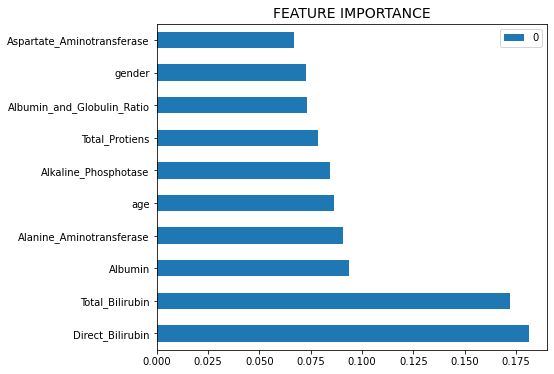

In [49]:
dd.plot(kind='barh', figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

### *Direct_Bilirubin & Total_Bilirubin are the most important features to predict the outcome*

## *Scaling*

In [1398]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X), columns=X.columns)

In [1399]:
X_scaled.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [1400]:
y.tail()

578    2
579    1
580    1
581    1
582    2
Name: outcome, dtype: int64

## *Train test split*


In [1401]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=11)

## *1.Random Forest classifier*

In [1402]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report

rfc=accuracy_score(y_test,y_predict)
rfc

0.7714285714285715

In [1403]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,120,9
2,31,15


In [1404]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.79      0.93      0.86       129
           2       0.62      0.33      0.43        46

    accuracy                           0.77       175
   macro avg       0.71      0.63      0.64       175
weighted avg       0.75      0.77      0.74       175



## *2.KNeighborsClassifier*

In [1405]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
y_predict=model.predict(X_test)

knn=accuracy_score(y_test,y_predict)
knn


0.6685714285714286

In [1406]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,104,25
2,33,13


In [1407]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.76      0.81      0.78       129
           2       0.34      0.28      0.31        46

    accuracy                           0.67       175
   macro avg       0.55      0.54      0.55       175
weighted avg       0.65      0.67      0.66       175



## *3.XGBClassifier*

In [1408]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

xgb=accuracy_score(y_test,y_predict)
xgb


[20:21:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.76

In [1409]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,116,13
2,29,17


In [1410]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85       129
           2       0.57      0.37      0.45        46

    accuracy                           0.76       175
   macro avg       0.68      0.63      0.65       175
weighted avg       0.74      0.76      0.74       175



## *4.Decision treeClassifier*

In [1411]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
dt=accuracy_score(y_test,y_predict)
dt

0.6171428571428571

In [1412]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,90,39
2,28,18


In [1413]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.76      0.70      0.73       129
           2       0.32      0.39      0.35        46

    accuracy                           0.62       175
   macro avg       0.54      0.54      0.54       175
weighted avg       0.65      0.62      0.63       175



## *5.Logistic Regression*

In [1414]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
lg=accuracy_score(y_test,y_predict)
lg

0.7714285714285715

In [1415]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,121,8
2,32,14


In [1416]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.79      0.94      0.86       129
           2       0.64      0.30      0.41        46

    accuracy                           0.77       175
   macro avg       0.71      0.62      0.63       175
weighted avg       0.75      0.77      0.74       175



## *6.SupportVectorMachine*

In [1417]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
svm=accuracy_score(y_test,y_predict)
svm

0.7371428571428571

In [1418]:
pd.crosstab(y_test,y_predict)

col_0,1
outcome,
1,129
2,46


In [1419]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85       129
           2       0.00      0.00      0.00        46

    accuracy                           0.74       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.54      0.74      0.63       175



C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## *7.ExtraTreesClassifier*

In [1420]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
Etc=accuracy_score(y_test,y_predict)
Etc

0.7257142857142858

In [1421]:
results= [['KNN Classifier', knn], ['XGBoost Classifier', xgb], ['RandomForestClassifier', rfc],
              ['DecisionTreeClassifier', dt],['LogisticRegression',lg],['ExtraTreesClassifier',Etc],['SVM',svm]]

Liverpatient_predi= pd.DataFrame(results, columns = ['classification models', 'accuracy_score'])
Liverpatient_predi

,classification models,accuracy_score
0,KNN Classifier,0.668571
1,XGBoost Classifier,0.760000
2,RandomForestClassifier,0.771429
3,DecisionTreeClassifier,0.617143
4,LogisticRegression,0.771429
5,ExtraTreesClassifier,0.725714
6,SVM,0.737143


<AxesSubplot:title={'center':'Classification models & accuracy scores'}, xlabel='classification models', ylabel='accuracy_score'>

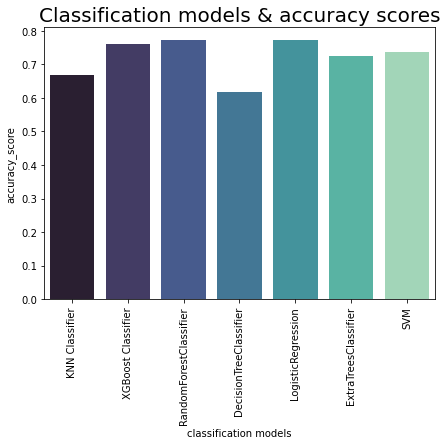

In [1422]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores',fontsize=20)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")

# *As this dataset is imabalanced using SMOTE to Balance the data.*

In [1423]:
X_scaled.head()

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [1424]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [1425]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

In [1426]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [1427]:
y_train.value_counts()

1    288
2    120
Name: outcome, dtype: int64

In [1428]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [1429]:
y_train_smote.value_counts()

1    288
2    288
Name: outcome, dtype: int64

In [1430]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## *1.Random Forest Classifier*

In [1431]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_smote, y_train_smote)
y_predict=model1.predict(X_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1

0.6914285714285714

In [1432]:
pd.crosstab(y_test, y_predict)

col_0,1,2
outcome,,
1,101,27
2,27,20


In [1433]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79       128
           2       0.43      0.43      0.43        47

    accuracy                           0.69       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.69      0.69      0.69       175



## *2.KNeighborsClassifier*

In [1434]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()  
model2.fit(X_train_smote, y_train_smote)
y_predict = model2.predict(X_test)
knn1=(accuracy_score(y_test, y_predict))
knn1

0.5657142857142857

In [1435]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,66,62
2,14,33


In [1436]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.82      0.52      0.63       128
           2       0.35      0.70      0.46        47

    accuracy                           0.57       175
   macro avg       0.59      0.61      0.55       175
weighted avg       0.70      0.57      0.59       175



## *3.XGBClassifier*

In [1437]:
from xgboost import XGBClassifier
model3=XGBClassifier()
model3.fit(X_train_smote, y_train_smote)
y_predict= model3.predict(X_test)
xgb1=accuracy_score(y_test,y_predict)
xgb1

[20:21:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7371428571428571

In [1438]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,103,25
2,21,26


In [1439]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.83      0.80      0.82       128
           2       0.51      0.55      0.53        47

    accuracy                           0.74       175
   macro avg       0.67      0.68      0.67       175
weighted avg       0.74      0.74      0.74       175



## *4.DecisionTreeClassifier*

In [1440]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_smote, y_train_smote)
y_predict=model4.predict(X_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1

0.64

In [1441]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,88,40
2,23,24


In [1442]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.79      0.69      0.74       128
           2       0.38      0.51      0.43        47

    accuracy                           0.64       175
   macro avg       0.58      0.60      0.58       175
weighted avg       0.68      0.64      0.65       175



## *5.LogisticRegression*

In [1443]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train_smote, y_train_smote)
y_predict=model5.predict(X_test)
logi1=accuracy_score(y_test, y_predict)
logi1

0.68

In [1444]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,77,51
2,5,42


In [1445]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.94      0.60      0.73       128
           2       0.45      0.89      0.60        47

    accuracy                           0.68       175
   macro avg       0.70      0.75      0.67       175
weighted avg       0.81      0.68      0.70       175



## *6.SupportVectorMachine*

In [1446]:
from sklearn.svm import SVC
model6= SVC()
model6.fit(X_train_smote,y_train_smote)
y_predict=model6.predict(X_test)
svm1=accuracy_score(y_test,y_predict)
svm1

0.6514285714285715

In [1447]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,72,56
2,5,42


In [1448]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.94      0.56      0.70       128
           2       0.43      0.89      0.58        47

    accuracy                           0.65       175
   macro avg       0.68      0.73      0.64       175
weighted avg       0.80      0.65      0.67       175



## *7.ExtraTreesClassifier*

In [1449]:
from sklearn.ensemble import ExtraTreesClassifier
model7=ExtraTreesClassifier()
model7.fit(X_train_smote,y_train_smote)
y_predict=model7.predict(X_test)
Etc1=accuracy_score(y_test,y_predict)
Etc1

0.7085714285714285

In [1450]:
pd.crosstab(y_test,y_predict)

col_0,1,2
outcome,,
1,102,26
2,25,22


In [1451]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80       128
           2       0.46      0.47      0.46        47

    accuracy                           0.71       175
   macro avg       0.63      0.63      0.63       175
weighted avg       0.71      0.71      0.71       175



In [1452]:
### *comparison-Accuracy scores of models after smote* 

In [1453]:
acc_smote= [['KNN Classifier', knn1], ['XGBoost Classifier', xgb1], ['RandomForestClassifier', rfc1],
              ['DecisionTreeClassifier', dtc1],['LogisticRegression',logi1],['Support Vector machine',svm1],['ExtraTreesClassifier',Etc1]]

Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.565714
1,XGBoost Classifier,0.737143
2,RandomForestClassifier,0.691429
3,DecisionTreeClassifier,0.640000
4,LogisticRegression,0.680000
5,Support Vector machine,0.651429
6,ExtraTreesClassifier,0.708571


<AxesSubplot:title={'center':'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

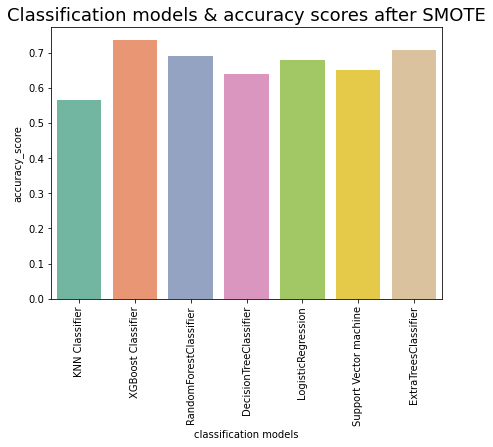

In [1454]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_pred,palette ="Set2")

- ### *By Considering 7 models, Xgb showing better accuracy,0.73.In this dataset,outcome is classified as 1 and 2. category 1 represents the positive case(liver patients)and category 2 represents -ve cases(not a liver patient).In this case we have to focus on type 2 error,i.e,False Negative.(the predicted value is -ve but it is actually +ve, which considered as a dangerous situation.)so aiming reducing type 2 error.Using these 7 models, Logistic regression model really helps to reduce this issue.only 5 of the patients are -vely classified.*

## *ROC & AUC*

### *The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.*

### *The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.*



- ### *Considering XGBClassifier for ROC &AUC as this model showing better accuracy among 7 models used.*

In [1455]:
probability = model3.predict_proba(X_test)[:, 0]

C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [1456]:
print(probability)

[0.27526444 0.9626264  0.9977286  0.8692134  0.9871987  0.876866
 0.02439839 0.02739626 0.15671575 0.99928    0.16721231 0.99728554
 0.07017136 0.2982794  0.94180185 0.9982067  0.6243355  0.90512174
 0.7519394  0.9988129  0.9801528  0.97635716 0.9883126  0.9961483
 0.9703007  0.6457981  0.9844797  0.93608904 0.41330576 0.08265221
 0.9876772  0.7143396  0.957662   0.13568783 0.38687432 0.9434816
 0.9971325  0.82007504 0.82758164 0.74598175 0.6999938  0.02064174
 0.9984191  0.9473256  0.11078697 0.99694633 0.135916   0.0209291
 0.08493149 0.974065   0.08765155 0.99971145 0.88318527 0.7269778
 0.973638   0.01366973 0.52834195 0.5481607  0.10791481 0.04157317
 0.7630584  0.97883564 0.14983022 0.9835813  0.35722482 0.57784367
 0.97665113 0.9996775  0.6800685  0.9986517  0.29256374 0.95322144
 0.9906025  0.11218113 0.99865496 0.8585188  0.4589635  0.90748036
 0.00644743 0.9761368  0.8215319  0.99884486 0.10495538 0.9993136
 0.9954877  0.97461087 0.21598446 0.9943543  0.9954043  0.8373616
 0.

In [1457]:
y_test[y_test == 2] = 0

In [1458]:
y_test

355    0
407    1
90     1
402    1
268    1
      ..
108    0
264    0
582    0
464    0
419    1
Name: outcome, Length: 175, dtype: int64

In [1459]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

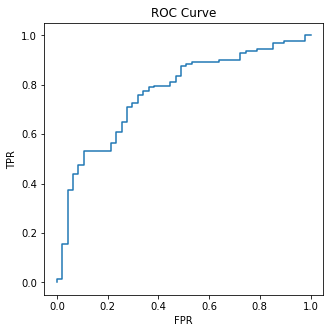

In [1460]:
fpr,tpr,thresholds = roc_curve(y_test,probability)


plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [1461]:
tpr

array([0.       , 0.0078125, 0.015625 , 0.015625 , 0.15625  , 0.15625  ,
       0.3359375, 0.3515625, 0.375    , 0.375    , 0.4375   , 0.4375   ,
       0.4765625, 0.4765625, 0.53125  , 0.53125  , 0.5625   , 0.5625   ,
       0.609375 , 0.609375 , 0.6484375, 0.6484375, 0.7109375, 0.7109375,
       0.7265625, 0.7265625, 0.7578125, 0.7578125, 0.7734375, 0.7734375,
       0.7890625, 0.7890625, 0.796875 , 0.796875 , 0.8125   , 0.8125   ,
       0.8359375, 0.8359375, 0.875    , 0.875    , 0.8828125, 0.8828125,
       0.890625 , 0.890625 , 0.8984375, 0.8984375, 0.9296875, 0.9296875,
       0.9375   , 0.9375   , 0.9453125, 0.9453125, 0.96875  , 0.96875  ,
       0.9765625, 0.9765625, 1.       , 1.       ])

In [1462]:
roc_auc_score(y_test,probability)

0.7664561170212766

- ## *auc score is 0.78>0.5 , which is considered acceptable.*